# Random Forest


##  Task

Predict the max temperature for tomorrow for a city.

This is a supervised, regression machine learning problem. It is Supervised as both the features (data for the city) and the targets (temperature) are available for training. It is Regression, becuase the target value is continuous.



## 1. Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')

year: 2016 for all data points

month: number for month of the year

day: number for day of the year

week: day of the week as a character string

temp_2: max temperature 2 days prior

temp_1: max temperature 1 day prior

average: historical average max temperature

actual: max temperature measurement

friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

## 2. Prepare the dataset

In [4]:
## Import the dataset

df = pd.read_csv('temps.csv')
# change the path as necessary

print(df.head())

   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  


Text(0.5, 1.0, 'Friend Estimate')

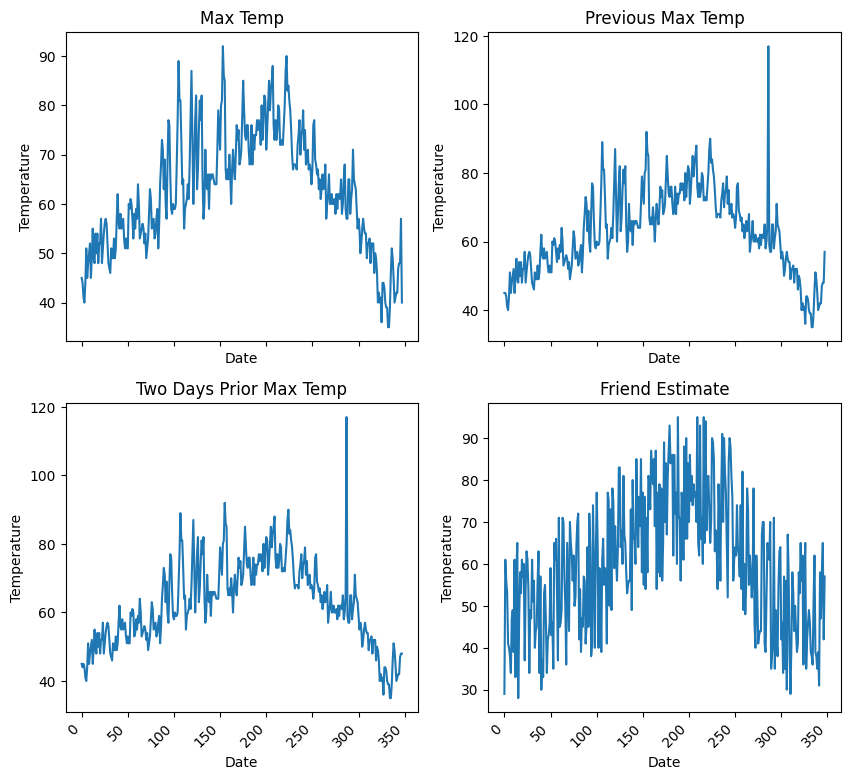

In [5]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(df['actual'])
ax1.set_xlabel('Date'); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(df['temp_1'])
ax2.set_xlabel('Date'); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# Temperature from 2 days ago
ax3.plot(df['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(df['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

# This plot can be improved by grouping x-axis values in terms of month.

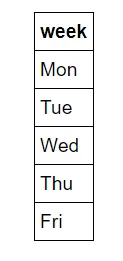

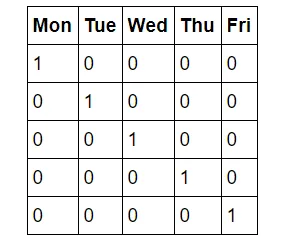

In [6]:
# Perform One-Hot Encoding for categorical data.
# In this case, the column 'week'

features = pd.get_dummies(df)
features.head(7)


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,46,46,46,41,False,False,False,False,False,True,False
5,2016,1,6,40,44,46.1,51,43,49,48,40,False,False,False,False,False,False,True
6,2016,1,7,44,51,46.2,45,45,49,46,38,False,False,False,False,True,False,False


In [7]:
# Convert to numpy array the training data and the target feature

X= features.drop('actual', axis = 1) # axis 1 refers to the columns
names = list(X.columns)
X = np.array(X)

y = np.array(features['actual'])


In [8]:
# Split data into training and testing sets

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.25)


In [9]:
print('Training Features :', X_train.shape)
print('Training Labels :', y_train.shape)
print('Testing Features :', X_test.shape)
print('Testing Labels :', y_test.shape)

Training Features : (261, 17)
Training Labels : (261,)
Testing Features : (87, 17)
Testing Labels : (87,)


## 6.**Random forest, Adaboost, Gradient boost and DT regressor**

In [10]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42)
regr_3 = GradientBoostingRegressor(random_state=0)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth = 3)



regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors_DT = abs(y_1 - y_test)
errors_Ada = abs(y_2 - y_test)
errors_GB = abs(y_3 - y_test)
errors = abs(predictions - y_test)

# Accuracy

# Print out the mean absolute error (mae)
print('Mean Absolute Error DT:', round(np.mean(errors_DT), 2))
print('Mean Absolute Error ADa:', round(np.mean(errors_Ada), 2))
print('Mean Absolute Error GB:', round(np.mean(errors_GB), 2) )
print('Mean Absolute Error_RF:', round(np.mean(errors), 2) )



# Calculate mean absolute percentage error (MAPE)
mape_DT = 100 * (errors_DT / y_test)
mape_Ada = 100 * (errors_Ada / y_test)
mape_GB = 100 * (errors_GB / y_test)
mape = 100 * (errors / y_test)

# Calculate accuracy
accuracy_DT = 100 - np.mean(mape_DT)
print('Accuracy DT:', round(accuracy_DT, 2), '%.')

accuracy_Ada = 100 - np.mean(mape_Ada)
print('Accuracy Ada:', round(accuracy_Ada, 2), '%.')

accuracy_GB = 100 - np.mean(mape_GB)
print('Accuracy GB:', round(accuracy_GB, 2), '%.')

accuracy = 100 - np.mean(mape)
print('Accuracy_RF:', round(accuracy, 2), '%.')


Mean Absolute Error DT: 3.95
Mean Absolute Error ADa: 3.64
Mean Absolute Error GB: 3.96
Mean Absolute Error_RF: 3.56
Accuracy DT: 93.32 %.
Accuracy Ada: 93.87 %.
Accuracy GB: 93.36 %.
Accuracy_RF: 93.94 %.


In [11]:
# Get numerical feature importances
importances = list(rf.feature_importances_)#property of rf:impurity-based feature importances.

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.62
Variable: average              Importance: 0.25
Variable: forecast_acc         Importance: 0.09
Variable: forecast_noaa        Importance: 0.02
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: day                  Importance: 0.0
Variable: temp_2               Importance: 0.0
Variable: forecast_under       Importance: 0.0
Variable: friend               Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [12]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [names.index('temp_1'), names.index('average')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, y_train)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 3.81
Accuracy: 93.5 %.


## 6. Visualize random forest

Decision Tree # 3


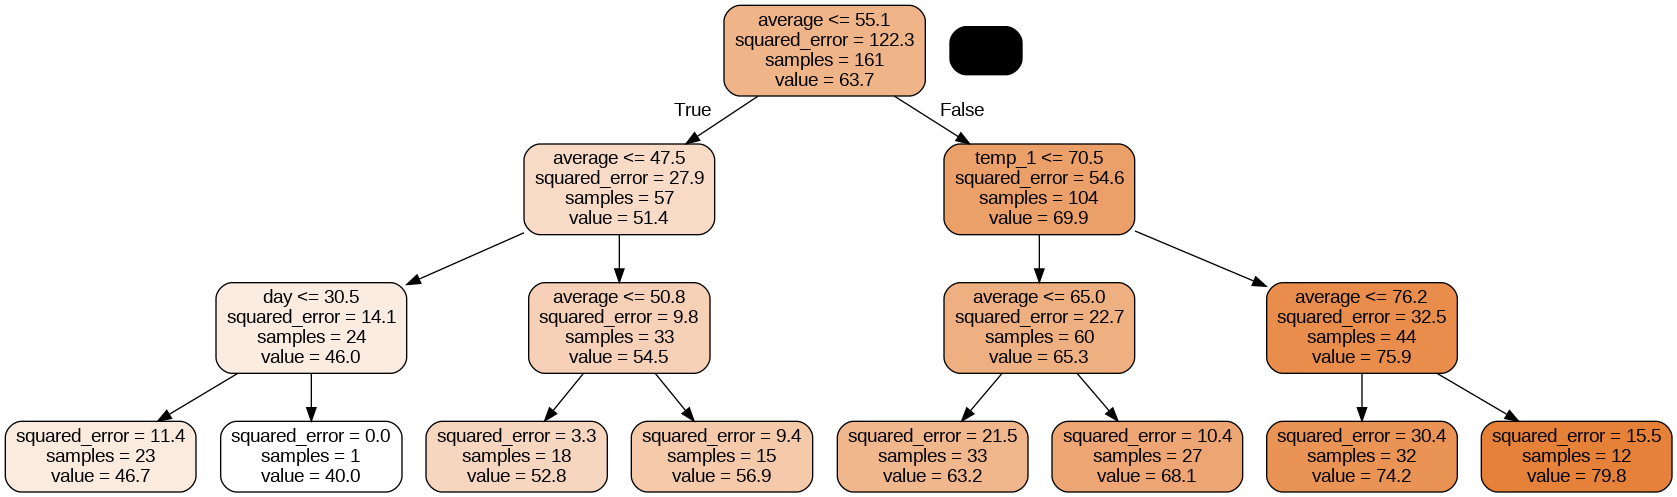

In [13]:
#import os  # Windows OS
#os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz' # Windows OS


from io import StringIO  # Use io.StringIO instead of sklearn.externals.six

from sklearn.tree import export_graphviz

dot_data = StringIO()

tree = rf.estimators_[3] #Decision Tree # 3 wll be printed

export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = names, precision=1)

import pydotplus

# may need to install
# conda install -c conda-forge pydotplus

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

print('Decision Tree # 3')
from IPython.display import Image
Image(graph.create_png())


Decision Tree # 995


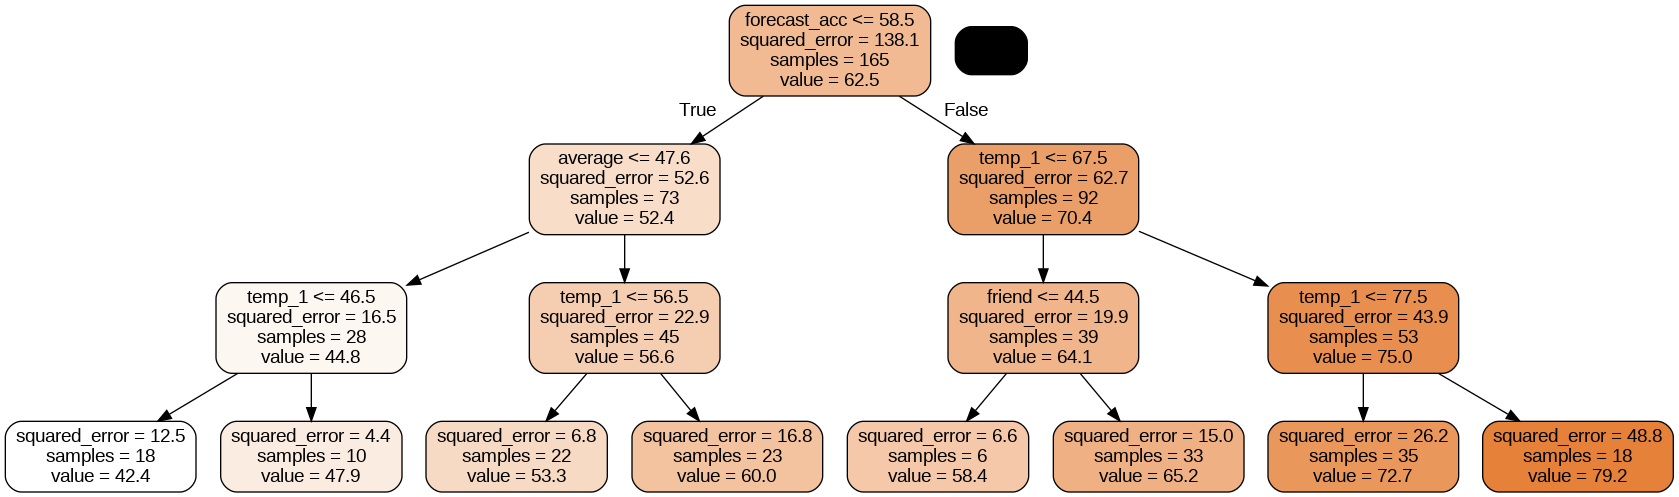

In [14]:
#import os  # Windows OS
#os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz' # Windows OS


from io import StringIO  # Use io.StringIO instead of sklearn.externals.six
from sklearn.tree import export_graphviz


dot_data = StringIO()

tree = rf.estimators_[995]

export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = names, precision=1)

import pydotplus

# may need to install
# conda install -c conda-forge pydotplus

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

print('Decision Tree # 995')
from IPython.display import Image
Image(graph.create_png())